# TechHorizon Internship - Task 1
### Classify Handwritten Digits Using a Simple Neural Network (MNIST Dataset)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


In [2]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")


Training data shape: (60000, 28, 28), Test data shape: (10000, 28, 28)


In [3]:
# Normalize pixel values
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# flatten images
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


In [4]:
# Build the model
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(784,))),
model.add(Dense(64, activation='relu')),
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [6]:
# Train the model with validation data
history = model.fit(X_train, y_train_cat,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=early_stop,
                    verbose=2)


Epoch 1/15
375/375 - 2s - loss: 0.3730 - accuracy: 0.8939 - val_loss: 0.1784 - val_accuracy: 0.9476 - 2s/epoch - 7ms/step
Epoch 2/15
375/375 - 1s - loss: 0.1492 - accuracy: 0.9565 - val_loss: 0.1316 - val_accuracy: 0.9639 - 1s/epoch - 3ms/step
Epoch 3/15
375/375 - 1s - loss: 0.1031 - accuracy: 0.9694 - val_loss: 0.1121 - val_accuracy: 0.9668 - 1s/epoch - 3ms/step
Epoch 4/15
375/375 - 1s - loss: 0.0785 - accuracy: 0.9769 - val_loss: 0.1070 - val_accuracy: 0.9685 - 1s/epoch - 3ms/step
Epoch 5/15
375/375 - 1s - loss: 0.0605 - accuracy: 0.9825 - val_loss: 0.0896 - val_accuracy: 0.9735 - 1s/epoch - 3ms/step
Epoch 6/15
375/375 - 1s - loss: 0.0486 - accuracy: 0.9852 - val_loss: 0.0940 - val_accuracy: 0.9729 - 1s/epoch - 3ms/step
Epoch 7/15
375/375 - 1s - loss: 0.0373 - accuracy: 0.9888 - val_loss: 0.0913 - val_accuracy: 0.9737 - 1s/epoch - 3ms/step
Epoch 8/15
375/375 - 1s - loss: 0.0298 - accuracy: 0.9914 - val_loss: 0.1019 - val_accuracy: 0.9737 - 1s/epoch - 3ms/step
Epoch 9/15
375/375 - 1s 

In [7]:
# Evaluate the model on test set
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=1)
print(f" Test Accuracy: {test_acc:.4f}")


313/313 [==============================] - 1s 2ms/step - loss: 0.0836 - accuracy: 0.9738
 Test Accuracy: 0.9738


In [8]:
# save model
model.save('Final_Digit_Classify_model.h5')


In [9]:
# Step 8: Predict and decode
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

313/313 [==============================] - 1s 2ms/step


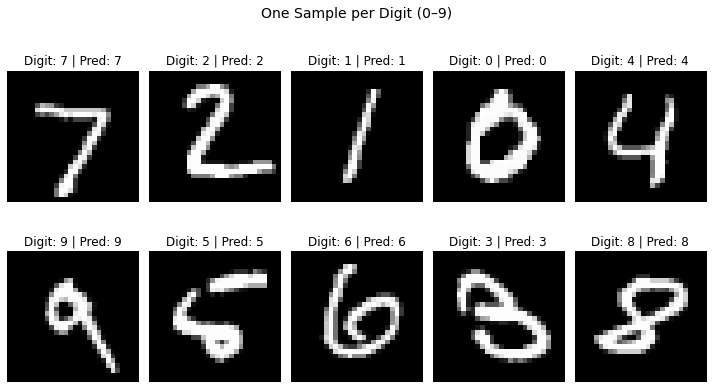

In [10]:
# Show 1 image for each digit from 0 to 9
plt.figure(figsize=(10, 6))
shown_digits = set()
shown = 0

for i in range(len(X_test)):
    label = y_test[i]
    if label not in shown_digits:
        plt.subplot(2, 5, shown + 1)
        plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"Digit: {label} | Pred: {y_pred_classes[i]}")
        plt.axis('off')
        shown_digits.add(label)
        shown += 1
    if shown == 10:
        break

plt.suptitle("One Sample per Digit (0–9)", fontsize=14)
plt.tight_layout()
plt.show()


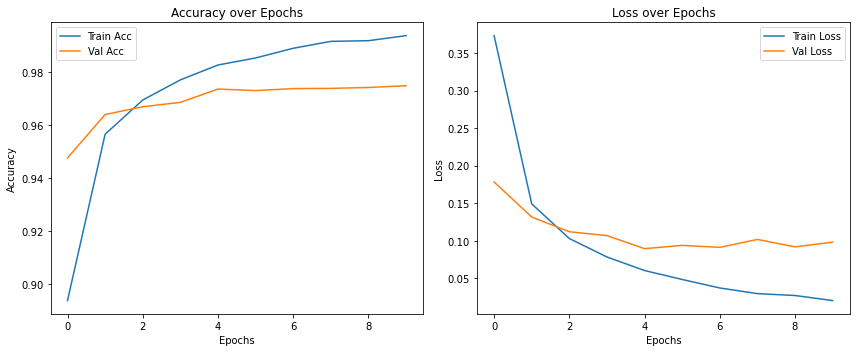

In [11]:
# Accuracy & Loss Graphs
plt.figure(figsize=(12, 5))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
# Classification Report & Confusion Matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.95      0.98      0.96       892
           6       0.98      0.98      0.98       958
           7       0.98      0.96      0.97      1028
           8       0.97      0.96      0.96       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



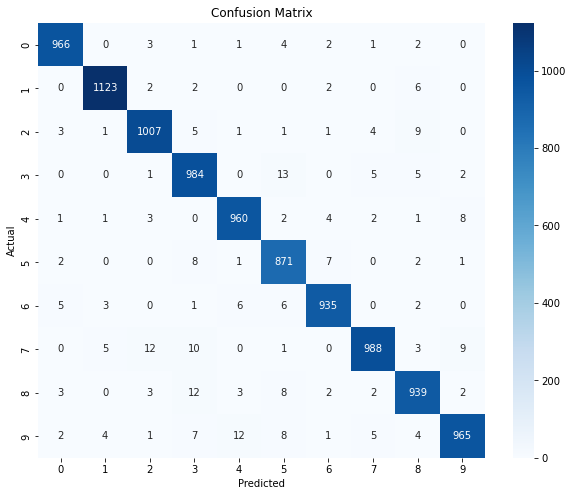

In [13]:
# Confusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()